In [2]:
import json
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os
from pprint import pprint

In [3]:
def get_accuracy(data):

    accuracy = 0
    for example in data:
        if example['answer'] == example['output']:
            accuracy += 1
    return accuracy / len(data)

In [10]:
data_dir = '../data/blimp-output'

def load_blimp_results(model_name, grammar_type, n_shots, multiple_choice=True):
    if multiple_choice:
        file_path = f'{data_dir}/{model_name}/{grammar_type}_multiple_choice_{n_shots}_shot_dataset.json'
    else:
        file_path = f'{data_dir}/{model_name}/{grammar_type}_binary_{n_shots}_shot_dataset.json'

    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [11]:
def load_all_blimp_results(grammar_type, n_shots, multiple_choice=True):
    file_path = f'{grammar_type}_'
    if multiple_choice:
        file_path += 'multiple_choice_'
    else:
        file_path += 'binary_'

    results = {}

    for folder in os.listdir(data_dir):
        if not folder.startswith('Llama'):
            continue

        for n_shot in n_shots:
            data = load_blimp_results(folder, grammar_type, n_shot, multiple_choice)
            if n_shot not in results:
                results[n_shot] = {}
            
            results[n_shot][folder] = get_accuracy(data)
    
    return results

In [36]:
def plot_blimp_results(multiple_choice_results, binary_results):

    _, axs = plt.subplots(1, 2, figsize=(10, 4))

    n_shots = list(multiple_choice_results.keys())
    datasets = [multiple_choice_results, binary_results]

    for i in range(2):
        model_data = {}
        for n_shot in datasets[i].keys():
            for model in datasets[i][n_shot].keys():
                if model not in model_data:
                    model_data[model] = []
                model_data[model].append(datasets[i][n_shot][model])
        
        for model in model_data.keys():
            axs[i].plot(n_shots, model_data[model], label=model)
            for j, n_shot in enumerate(n_shots):
                axs[i].text(n_shot, model_data[model][j], f'{model_data[model][j]:.2f}', ha='center', va='bottom')
        if i == 0:
            axs[i].set_title('Multiple Choice')
        else:
            axs[i].set_title('Binary')
        axs[i].set_xlabel('N-shot')
        axs[i].set_ylabel('Accuracy')
        axs[i].legend()
    plt.tight_layout()
    plt.show()


In [17]:
n_shots = [1, 5, 10, 20]
multiple_choice_results = load_all_blimp_results('anaphor_number_agreement', n_shots, True)

pprint(multiple_choice_results)

{1: {'Llama-3.1-8B-Instruct': 0.95,
     'Llama-3.2-1B-Instruct': 0.502,
     'Llama-3.2-3B-Instruct': 0.647},
 5: {'Llama-3.1-8B-Instruct': 0.981,
     'Llama-3.2-1B-Instruct': 0.512,
     'Llama-3.2-3B-Instruct': 0.88},
 10: {'Llama-3.1-8B-Instruct': 0.947,
      'Llama-3.2-1B-Instruct': 0.495,
      'Llama-3.2-3B-Instruct': 0.905},
 20: {'Llama-3.1-8B-Instruct': 0.96,
      'Llama-3.2-1B-Instruct': 0.536,
      'Llama-3.2-3B-Instruct': 0.87}}


In [18]:
binary_results = load_all_blimp_results('anaphor_number_agreement', n_shots, False)
pprint(binary_results)

{1: {'Llama-3.1-8B-Instruct': 0.822,
     'Llama-3.2-1B-Instruct': 0.564,
     'Llama-3.2-3B-Instruct': 0.723},
 5: {'Llama-3.1-8B-Instruct': 0.89,
     'Llama-3.2-1B-Instruct': 0.576,
     'Llama-3.2-3B-Instruct': 0.696},
 10: {'Llama-3.1-8B-Instruct': 0.946,
      'Llama-3.2-1B-Instruct': 0.533,
      'Llama-3.2-3B-Instruct': 0.786},
 20: {'Llama-3.1-8B-Instruct': 0.923,
      'Llama-3.2-1B-Instruct': 0.534,
      'Llama-3.2-3B-Instruct': 0.835}}


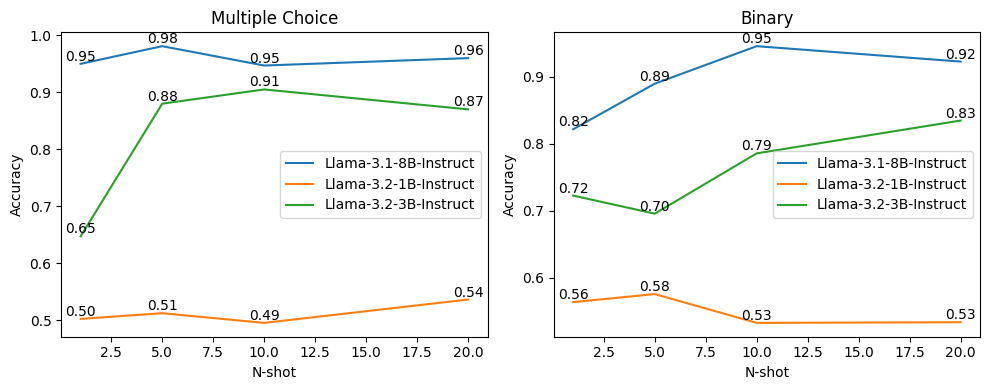

In [37]:
plot_blimp_results(multiple_choice_results, binary_results)